# Problem 81 (solved)

This problem was asked by Yelp.

Given a mapping of digits to letters (as in a phone number), and a digit string, return all possible letters the number could represent. You can assume each valid number in the mapping is a single digit.

For example if `{'2': ['a', 'b', 'c'], '3': ['d', 'e', 'f'], }` then `"23"` should return `['ad', 'ae', 'af', 'bd', 'be', 'bf', 'cd', 'ce', 'cf']`.


In [101]:
import itertools
mapping={
    "2":["a","b","c"],
    "3":["d","e","f"],
}

s="23"

def keyboard(mapping, s):
    return ["".join(x)  for x in list( itertools.product((*[mapping[c] for c in s])) ) ]

assert keyboard(mapping,s)==["ad","ae","af","bd","be","bf","cd","ce","cf"]


# Problem 82

This problem was asked Microsoft.

Using a read7() method that returns 7 characters from a file, implement readN(n) which reads n characters.

For example, given a file with the content "Hello world", three read7() returns "Hello w", "orld" and then "".


In [71]:
class FileProxy:
    def __init__(self, contents):
        self.contents = contents
        self.offset = 0
        self.buffer=""

    def read7(self):
        start = self.offset
        end = min(self.offset + 7, len(self.contents))
        self.offset = end
        return self.contents[start:end].strip()
    
    def readN(n):
        temp=self.read_7()
        self.buffer=temp[]
    
file=FileProxy("Hello world")

print(file.read7())
print(file.read7())
print(file.read7())
print(file.read7())

Hello w
orld




# Problem 83 (solved)



This problem was asked by Google.

Invert a binary tree.

For example, given the following tree:
```
    a
   / \
  b   c
 / \  /
d   e f
```

should become:
```
  a
 / \
 c  b
 \  / \
  f e  d
```

In [59]:
class Node():
    def __init__(self,value,left=None,right=None):
        self.value=value
        self.left=left
        self.right=right
        

root=Node("a",Node("b",Node("d"),Node("e")),Node("c",Node("f")))

def DFS(node):
    if node is None: return
    else:
        DFS(node.left)
        DFS(node.right)
        temp=node.left
        node.left=node.right
        node.right=temp
        
def print_tree(node):
    if node is None: return
    else:
        print(node.value)
        print_tree(node.left)
        print_tree(node.right)
        
print_tree(root)
DFS(root)
print("")
print_tree(root)

a
b
d
e
c
f

a
c
f
b
e
d


# Problem 84 (solved)


This problem was asked by Amazon.

Given a matrix of 1s and 0s, return the number of "islands" in the matrix. A 1 represents land and 0 represents water, so an island is a group of 1s that are neighboring and their perimeter is surrounded by water.

For example, this matrix has 4 islands.

```
1 0 0 0 0
0 0 1 1 0
0 1 1 0 0
0 0 0 0 0
1 1 0 0 1
1 1 0 0 1
```

In [41]:
import numpy as np

mat=[
    [1,0,0,0,0],
    [0,0,1,1,0],
    [0,1,1,0,0],
    [0,0,0,0,0],
    [1,1,0,0,1],
    [1,1,0,0,1], 
]
mat=np.array(mat)

width=len(mat[0])
height=len(mat)
visited=np.zeros((height,width))

def search_island(mat,i,j):
    
    if visited[i,j]==1: return 0
    if (j<0 or i>height or j>width): return 0
    
    visited[i,j]=1
    mat[i,j]=0
    for row in range(i-1,i+1):
        for column in range(j-1,j+1):
            search_island(mat,row,column)

def count_islands(mat):
    count=0
    for i in range(height):
        for j in range(width):
            if mat[i,j]==1: 
                count+=1
                search_island(mat,i,j)
    return count


assert count_islands(mat)==4

# Problem 85 (solved)


This problem was asked by Facebook.

Given three 32-bit integers x, y, and b, return x if b is 1 and y if b is 0, using only mathematical or bit operations. You can assume b can only be 1 or 0.


In [26]:
b=1
x=23137
y=12393

def f(x,y,b):
    return b * x + (not b) * y

assert f(x,y,0)==y
assert f(x,y,1)==x

# Problem 86 (solved)


This problem was asked by Google.

Given a string of parentheses, write a function to compute the minimum number of parentheses to be removed to make the string valid (i.e. each open parenthesis is eventually closed).

For example, given the string "()())()", you should return 1. Given the string ")(", you should return 2, since we must remove all of them.


In [131]:
def remove_parentheses(s):
    count=0
    for char in s:
        if char!="(":
            count+=1
        else: break
    for char in s[count:]:
        if char=="(": count+=1
        if char==")": count-=1
    return np.abs(count)

assert remove_parentheses("()())()")==1
assert remove_parentheses(")(")==2

# Problem 87



This problem was asked by Uber.

A rule looks like this:

`A NE B`

This means this means point A is located northeast of point B.

`A SW C`

means that point A is southwest of C.

Given a list of rules, check if the sum of the rules validate. For example:
```
A N B
B NE C
C N A
```
does not validate, since A cannot be both north and south of C.

```
A NW B
A N B
```

is considered valid.

In [218]:
rules=[
    "A NW B",
    "A N B"
]

mapping={
    "N":[-1,0],
   "S":[1,0],
    "E":[0,1],
    "W":[0,-1],
    "NW":[-1,1],
    "NE":[-1,-1],
    "SW":[1,1],
    "SE":[1,-1]
}

import numpy as np
grid=np.zeros(  (len(rules)+1,len(rules)+1)  ,dtype=str)

s=rules[0].split()
grid[  int(len(grid)/2)   ,  int(len(grid)/2)  ]=s[2]
pos=mapping[s[1]]
grid[  int(len(grid)/2)+pos[0]  , int(len(grid)/2)+pos[1]  ]=s[0]

grid
# for rule in rules[1:]:
#     s=rule.split()
    

array([['', '', 'A'],
       ['', 'B', ''],
       ['', '', '']], dtype='<U1')

# Problem 88 (solved)


This question was asked by ContextLogic.

Implement division of two positive integers without using the division, multiplication, or modulus operators. Return the quotient as an integer, ignoring the remainder.


In [236]:
def division(a,b):
    count=0
    while a>=b:
        a-=b
        count+=1
    return count

assert division(48,6)==48//6
assert division(47,6)==47//6
assert division(4,2)==4//2

# Problem 89


This problem was asked by LinkedIn.

Determine whether a tree is a valid binary search tree.

A binary search tree is a tree with two children, left and right, and satisfies the constraint that the key in the left child must be less than or equal to the root and the key in the right child must be greater than or equal to the root.

In [330]:
import sys
class Node():
    def __init__(self,value,left=None,right=None):
        self.value=value
        self.left=left
        self.right=right

        
def is_valid_bst(node,value=None,which=None):
    if not node: return
    
    print(node.value)
    if which=="left":
        if node.value>value: return False
    if which=="right":
        if node.value<value: return False
    is_valid_bst(node.left,node.value,"left")
    is_valid_bst(node.right,node.value,"right")
    
    return True

# a = Node(3)
# b = Node(2)
# c = Node(6)
# d = Node(1)
# e = Node(3)
# f = Node(4)

# a.left = b
# a.right = c
# b.left = d
# b.right = e
# c.left = f


# assert is_valid_bst(a)


root=Node(1,Node(2,Node(1),Node(3)),Node(6,Node(4))   )

assert not is_valid_bst(root)


1
2
6
4


AssertionError: 

# Problem 90 (solved)

This question was asked by Google.

Given an integer n and a list of integers l, write a function that randomly generates a number from 0 to n-1 that isn't in l (uniform).


(array([143132., 143027.,      0.,      0.,      0., 142270., 142976.,
        142768., 142456., 143371.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

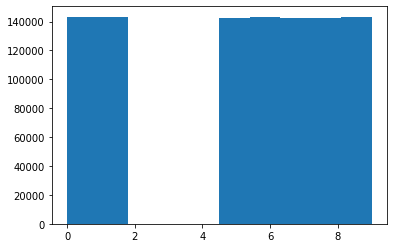

In [344]:
import numpy as np
import matplotlib.pyplot as plt
def rand(n,l):
    num=np.random.randint(n)
    while num in l:
          num=np.random.randint(n)
    return num

l=[2,3,4]
n=10


nums=list(map(lambda x: rand(n,l), range(1000000)))
plt.hist(nums,bins=n)